# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Anisa Sahara
- **Email:** anisa4sahara123@gmail.com
- **ID Dicoding:** swag_spectra

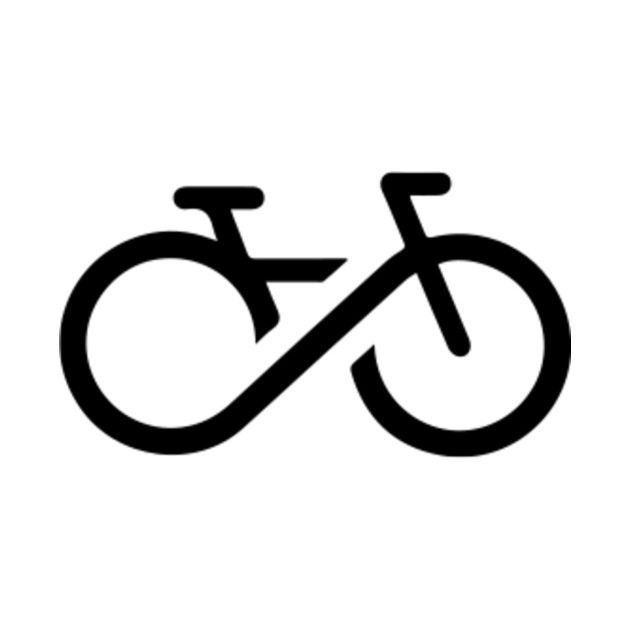

**1. Pengenalan Proyek**

**1.1 Latar Belakang**


This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the Capital bike share system with the corresponding weather and seasonal information.

Data Set Information:
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.
Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

**1.2 Tentang Data Set**


Proses penyewaan Bike Sharing memiliki korelasi yang kuat dengan kondisi lingkungan dan musim. Misalnya, kondisi cuaca,
curah hujan, hari dalam seminggu, musim, jam, dll. Semua hal tersebut dapat memengaruhi perilaku penyewaan. Set data inti terkait dengan
catatan historis dua tahun yang sesuai dengan tahun 2011 dan 2012 dari sistem Capital Bikeshare, Washington D.C., AS yang
tersedia untuk umum di http://capitalbikeshare.com/system-data. Pengolah data mengagregasi data tersebut setiap dua jam dan setiap hari, kemudian
mengekstraksi dan menambahkan informasi cuaca dan musim yang sesuai. Informasi cuaca diekstrak dari http://www.freemeteo.com.

**1.3 Intisari Latar Belakang**

Ada sebuah sistem transportasi unik di luar negri, namanya Sistem *Bike Sharing* atau kalau dalam bahasa sederhananya sarana transportasi tradisional yang bisa di gunakan umum tapi punya sistem operasional tertentu dari pendirinya. Jadi layanan ini tersebar di banyak titik, dimana pengguna bisa meminjam sepeda di satu lokasi dan bisa mengembalikannya di lokasi lain. <br>

Dataset ini bersumber dari Kaggle dan berasal dari Capital Bikeshare di Washington D.C., lalu dataset ini berisi data penyewaan sepeda per jam dan per harinya selama tahun 2011-2012.<br>

 Dari data ini bisa saya gunakan untuk mencari pola permintaan atau minat pengguna, pengaruh cuaca, dan juga perilaku pengguna, tujuan saya ingin membantu perusahaan penyedia layanan ini mengoptimalkan jasa layanan mereka.<br>



**1.4 Infomasi Atribut**


`instant` : Nomor urut data<br>
`dteday` : Tanggal pencatatan<br>
`season` : musim (1:Semi, 2:panas, 3:gugur, 4:dingin)<br>
`yr` : Tahun (0: 2011, 1:2012)<br>
`mnth` : Bulan ( 1 to 12)<br>
`hr` : Jam (0 to 23)<br>
`holiday` : weather day is holiday or not (extracted from [Web Link])<br>
`weekday` : Hari dalam 1 minggu<br>
`workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.<br>
`weathersit` :<br>
1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>
`temp` : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)<br>
`atemp`: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)<br>
`hum`: Normalized humidity. The values are divided to 100 (max)<br>
`windspeed`: Normalized wind speed. The values are divided to 67 (max)<br>
`casual`: count of casual users<br>
`registered`: count of registered users<br>
`cnt`: count of total rental bikes including both casual and registered<br>
for further more information please go through the following link,
http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset


## Menentukan Pertanyaan Bisnis

1.  Bagaimana musim dan cuaca bisa memberikan efek pada jumlah sepeda yang berhasil tersewa? Pada musim dan cuaca seperti apa tingkat penyewaan tertinggi dan berapa jumlah sepeda yang tersewakan?;✅
2.  Bagaimana perbandingan hari kerja dan hari libur terhadap penyewaan sepeda? Pada hari apa sepeda lebih banyak di sewa?;✅
3.  Bagaimana performa penyewaan perusahaan Bike Sharing dalam 2 tahun ini(2011-2012)?;✅
4.  Bagaimana tren bulanan pengguna casual dan registered?;✅
5.  Bagaimana pola penggunaan sepeda per jam mencerminkan kebiasaan dan rutinitas harian pengguna selama seminggu?; ✅



## Import Semua Packages/Library yang Digunakan

In [1]:
#memanggil library pandas untuk mengolah data
import pandas as pd
#memanggil library numpy untuk perhitungan numeriknya
import numpy as np
#memanggil library matpotlib dan seaborn untuk visualisasi datanya
import matplotlib.pyplot as plt
import seaborn as sns
#memanggil library matplotlib.patches untuk meningkatkan visualisasi
import matplotlib.patches as mpatches

import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")

print("Path to dataset files:", path)

100%|██████████| 286k/286k [00:00<00:00, 648kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1


## Data Wrangling

Tahap ini adalah proses mengubah data yang semula berantakan, kotor, atau masih dalam keadaan yang bisa kita sebut ***mentah***, menjadi format lain yang lebih tertata, bersih, berkualitas, terstruktur dan siap untuk di analisis.

### Gathering Data

Seperti namanya ***Gathering*** yang artinya ***Berkumpul***. Pada tahap ini saya akan mengumpulkan file data yang di butuhkan. Dengan Memuat tabel ***hour dan day dataset csv***.<br> Untuk mengetahui gambaran struktur kolomnya, saya akan menggunakan metode di bawah.

In [2]:
#memanggil pandas untuk membaca file data yang di butuhkan
hour_df = pd.read_csv("/root/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1/hour.csv")
#memanggil pandas untuk menampilkan 5 baris pertama dari file dataset hour
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
#memanggil pandas untuk membaca data day csv
day_df = pd.read_csv("/root/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1/day.csv")
#memanggil pandas untuk menamppilkan 5 baris pertama
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Kolom `cnt` ini menunjukan total penyewa sepeda baik itu yang tidak terdaftar ataupun yang terdaftar
- Di tabel ini yang di maksud pengguna tidak terdaftar itu `casual`, dan yang terdaftar itu `registered`
- Di tabel ini juga tertera value angka di bagian `season` (musim), dimana artinya adalah angka 1 menunjukan musim semi, 2 musim panas, 3 musim gugur, dan 4 musim dingin.
- Dibagian kolom `yr` atau `year`(tahun) terdapat value 0 untuk menunjukan bahwa saat itu atau data itu dari tahun 2011 dan value 1 untuk tahun 2012.
- Lalu kolom `weathersit` atau cuaca disini berisi angka juga dimana cuaca nomor<br>
1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian<br>
2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut<br>
3: Salju Ringan, Hujan Ringan + Badai Petir + Awan Bertebaran, Hujan Ringan + Awan Bertebaran<br>
4: Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut<br>

###  Assessing Data

Pada tahap ini, saya akan mengidentifikasi file data yang akan saya gunakan. Ini merupakan langkah penting untuk melihat masalah kualitas dalam data *( missing values atau nilai yang hilang, inconsistent data atau data yang tidak konsisten nilainya, inaccurate data atau data yang tidak akurat/salah, outliers atau datanya itu nilainya jauh dari konteks dan tidak ada alasan jelas adanya data itu dari mana konteksnya)* dan masalah keteraturan seperti penulisan yang buruk/ambigu dan informasi ganda. Namun perlu di ***ingat dalam tahap ini kita belum memperbaikinya***

**Assesing Data Hour**

In [4]:
#memeriksa tipe data dari tiap kolom  menggunakan method info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
#makesure jumlah missing value
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [6]:
#memeriksa ringkasan parameter statistik untuk makesure tidak adanya kesalahan lain
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
#memeriksa apakah hubungan cnt = casual + registered benar
(hour_df['casual'] + hour_df['registered']== hour_df['cnt']).all()


np.True_

**Asessing Data Day**

In [8]:
#memeriksa tipe data dari data set day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
#makesure keberadaan missing value dalam dataset
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [10]:
#membuat ringkasan parameter statistik dataset day
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
#memeriksa apakah hubungan cnt= casual + registered di data set day sesuai/benar
(day_df['casual'] + day_df['registered']== day_df['cnt']).all()

np.True_

**Insight:**

- Setelah saya ulik peran kolom instant dan workingday tidak di perlukan. dimana instant sejauh saya lihat hanya berperan sebagai nomor urut saja, sedangkan data wrokingday sudah di wakili oleh weekday yang penyimpanan data nya jelas bertipe int per hari yang diwakili oleh angka 0-6.

- informasi **pada header** tiap kolom pada data set masih kurang di pahami perlu **perbaikan** agar bisa **di pahami**.


```
day_df rename(colomns={'dtday' : 'date...}, inplace=True)
```


- Dari info datatype, keseluruhannya aman kecuali bisa kita liat pada kolom `dteday`seharusnya bertipe data **datetime** bukan **object**. Ini juga jadi alasan mengapa kolom `dteday` tidak muncul di hasil running method `describe()`. ***perbaiki agar bisa di gunakan untuk analisis waktu seperti tren harian atau musiman*** solusi

```
hour_df['dteday']=pd.to_datetime(hour_df['dteday'])
```

- Berdasarkan kolom `season,weathersit` pada ringkasan statistik, sebenarnya tidak ada masalah karena mereka ini **seharusnya** bertipe kategori(kode) saja, bukan angka yang bisa di hitung rata-ratanya atau std (standard deviasi). Kalau lihat dari kolom  `season dan mean` nilai rata-rata nya menunjukan 2,5. Ini berarti kolom tersebut nilainya di perlakukan layaknya numerik, **jadi kita harus ubah ke tipe category agar tau kalau ini adalah label bukan angka** solusinya

```
cat_cols = ['season','weathersit',...]
hour_df[cat_cols]=hour.df[cat_cols].astype('category')
```
- Kolom `holiday` dan `workingday`, mengacu pada informasi atribut<br> hari libur : apakah hari libur atau tidak (diambil dari [Web Link])<br> workingday : jika hari tersebut bukan akhir pekan atau hari libur maka nilainya 1, selain itu nilainya 0. Jika di telaah kembali keduanya punya nilai min=0 dan max=1 menurut saya ini bisa di katakan **kolom ini bertipe boolean**.
- Kolom `temp`, `atemp`, `hum`, `windspeed` semua nilainya sudah berada antara 0-1, artinya data ini sudah dinormalisasi. jadi sudah aman dan tidak perlu di ubah.
- Kolom  `casual`,`registered`, dan `cnt` sudah di cek ulang dan hasilnya true itu artinya tidak ada kesalahan.


###  Cleaning Data

Nah, kini kita masuk **proses akhir** dari **Data Wrangling** yaitu tahap pembersihan atau cleaning data, di sini saya akan **membersihkan berbagai masalah yang telah teridentifikasi sebelumnya** di tahap assesing data.

**Menghapus Data yang tidak relevan (Dropping Methods)**

In [12]:
#kita akan hapus data di kolom workingday saja, untuk instant sendiri ada atau tidak nya tidak masalah
hour_df.drop(columns=['workingday'], axis=1, inplace=True)
day_df.drop(columns=['workingday'], axis=1, inplace=True)

**Mengubah Tipe Data yang tidak sesuai**

**Mengubah tipe `int` menjadi tipe data `category`**

In [13]:
#mengubah tipe data kolom season dan weathersit dari numerik jadi label
columns = ['season','weathersit','mnth','holiday','weekday','yr']

for column in columns :
    hour_df[column]=hour_df[column].astype('category')
    day_df[column]=day_df[column].astype('category')

**Mengubah tipe data `object` jadi data `datetime`**

In [14]:
#mengubah tipe dteday dari object ke tipe datetime
hour_df['dteday'] =pd.to_datetime(hour_df['dteday'])
day_df['dteday'] =pd.to_datetime(day_df['dteday'])

**Rename**

Tahap ini sangat di perlukan mengingat keterangan nama yang sulit untuk dibaca dan juga untuk di pahami untuk orang umum

In [15]:
#rename dataset hour_df
hour_df.rename(columns={ 'dteday' : 'tanggal', 'yr' : 'tahun', 'mnth' : 'bulan', 'hr' : 'jam', 'holiday' : 'hari_libur', 'weekday' : 'seminggu' , 'weathersit' : 'kondisi_cuaca', 'temp' : 'suhu', 'windspeed' : 'kecepatan_angin', 'hum' : 'kelembaban', 'cnt' : 'total_penyewa', 'season' : 'musim'},inplace=True)

In [16]:
#rename dataset day_df
day_df.rename(columns={ 'dteday' : 'tanggal', 'yr' : 'tahun', 'mnth' : 'bulan', 'hr' : 'jam', 'holiday' : 'hari_libur', 'weekday' : 'seminggu' , 'weathersit' : 'kondisi_cuaca', 'temp' : 'suhu', 'windspeed' : 'kecepatan_angin', 'hum' : 'kelembaban','cnt' : 'total_penyewa','season' : 'musim'},inplace=True)

**Mengubah kode inisial dengan keterangan yang jelas**

Tahap ini juga perlu di rombak / di konversi supaya mudah untuk di pahami, di bandingkan jika kita menginisialkan suatu kategori atau kondisi menggunakan angka. Hal ini akan sulit di pahami untuk umum. Karena hanya developer yang mengerti istilah tersebut.

In [17]:
#konversi inisial musim yang sebelumnya menjadi : 1=Semi, 2=Panas, 3=Gugur, 4=Salju
day_df['musim'] = day_df['musim'].cat.rename_categories({1:'Semi', 2:'Panas', 3:'Gugur', 4:'Salju'})
hour_df['musim'] = hour_df['musim'].cat.rename_categories({1:'Semi', 2:'Panas', 3:'Gugur', 4:'Salju'})

In [18]:
#konversi inisial bulan yang sebelumnya jadi: 1=jan , 2=Feb, 3=Mar, 4=Apr dst...
day_df['bulan'] = day_df['bulan'].cat.rename_categories({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'Mei', 6:'Jun', 7:'Jul', 8:'Agu', 9:'Sep', 10:'Okt', 11:'Nov', 12:'Des'})
hour_df['bulan'] = hour_df['bulan'].cat.rename_categories({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'Mei', 6:'Jun', 7:'Jul', 8:'Agu', 9:'Sep', 10:'Okt', 11:'Nov', 12:'Des'})

In [19]:
#koversi inisial kondisi cuaca jadi 1=Cerah, 2=Berawan, 3=Hujan/Salju_ringan, 4=Hujan/Salju_lebat
day_df['kondisi_cuaca'] = day_df['kondisi_cuaca'].cat.rename_categories({1:'Cerah', 2:'Berawan', 3:'Hujan/Salju_ringan', 4:'Hujan/Salju_lebat'})
hour_df['kondisi_cuaca'] = hour_df['kondisi_cuaca'].cat.rename_categories({1:'Cerah', 2:'Berawan', 3:'Hujan/Salju_ringan', 4:'Hujan/Salju_lebat'})

In [20]:
#konversi inisial seminggu jadi: 0=Minggu 1=Senin 2=Selasa 3=Rabu 4=kamis dst..
day_df['seminggu'] = day_df['seminggu'].cat.rename_categories({0:'Minggu', 1:'Senin', 2:'Selasa', 3:'Rabu', 4:'Kamis', 5:'Jumat', 6:'Sabtu'})
hour_df['seminggu'] = hour_df['seminggu'].cat.rename_categories({0:'Minggu', 1:'Senin', 2:'Selasa', 3:'Rabu', 4:'Kamis', 5:'Jumat', 6:'Sabtu'})

In [21]:
#konversi tahun menjadi: 0=2011 1=2012
day_df['tahun'] = day_df['tahun'].cat.rename_categories({0:'2011',1:'2012'})
hour_df['tahun'] = hour_df['tahun'].cat.rename_categories({0:'2011', 1:'2012'})

In [22]:
#menghitung kelembaban
day_df['kelembaban'] = day_df['kelembaban'] * 100
hour_df['kelembaban'] = hour_df['kelembaban'] * 100

Selanjutnya kita akan mengkategorikan hari mana yang termasuk weekend dan weekdays

In [23]:
#membuat kolom baru bernama kategori_hari yang nunjukin isi kolom dengan weekend atau weekdays
seminggu = ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']
def get_kategori_hari(seminggu):
    if seminggu in ['Minggu', 'Sabtu']:
        return 'Weekend'
    else:
        return 'Weekdays'

day_df["kategori_hari"]= day_df["seminggu"].apply(get_kategori_hari)
hour_df["kategori_hari"]= hour_df["seminggu"].apply(get_kategori_hari)

In [24]:
#melakukan pengelompokan jenis kelembapan berdasarkan tingkat kelembaban
def classify_kelembaban(kelembaban):
    if kelembaban < 45:
        return 'Terlalu kering'
    elif 45 >= 45 and kelembaban < 65:
        return 'Ideal'
    else:
        return 'Terlalu lembab'

day_df["kategori_kelembaban"] = day_df['kelembaban'].apply(classify_kelembaban)
hour_df["kategori_kelembaban"] = hour_df['kelembaban'].apply(classify_kelembaban)

Bisa kita lihat,

- data workingday sudah terhapus✅
- tipe data pada kolom  dteday sudah kita ubah jadi datetime✅
- tipe data int pada season,mnth,holiday,weekday,weathersit sudah di ubah jadi kategori✅
- melakukan rename nama kolom agar mudah di pahami✅
- melakukan konversi beberapa ini inisial/istilah dalam kolom agar mudah di pahami✅
- membuat kolom baru yang namanya kategori_hari yang isinya berisi kategori weekdays dan weekend✅
- mengklasifikasi tingkat kelembaban✅


##   Exploratory Data Analysis (EDA)

Proses ini merupakan bagian dari analisis data yang bertujuan untuk mengeksplorasi dan mengenal sebuah data. Proses ini di mulai dengan mendefinisikan berbagai pertanyaan untuk menemukan insight. proses ini menerapkan visualisasi data untuk memvalidasi insight yang di peroleh. Jika, di analogikan proses EDA ini seperti proses penambangan yang mengumpulkan 100 batu untuk menemukan 1 atau 2 buah berlian yang berharga.

**Explore `hour_df` dan `day_df`**

In [25]:
hour_df.describe(include="all")

,instant,tanggal,musim,tahun,bulan,jam,hari_libur,seminggu,kondisi_cuaca,suhu,atemp,kelembaban,kecepatan_angin,casual,registered,total_penyewa,kategori_hari,kategori_kelembaban
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Gugur,2012,Jul,NaN,0.0,Sabtu,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekdays,Terlalu lembab
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


In [26]:
numeric_cols = hour_df.select_dtypes(include=np.number).columns
correlation_matrix = hour_df[numeric_cols].corr()
display(correlation_matrix)

,instant,jam,suhu,atemp,kelembaban,kecepatan_angin,casual,registered,total_penyewa
instant,1.000000,-0.004775,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
jam,-0.004775,1.000000,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
suhu,0.136178,0.137603,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.133750,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
kelembaban,0.009577,-0.276498,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
kecepatan_angin,-0.074505,0.137252,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.158295,0.301202,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.282046,0.374141,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
total_penyewa,0.278379,0.394071,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


In [27]:
day_df.describe(include="all")


,instant,tanggal,musim,tahun,bulan,hari_libur,seminggu,kondisi_cuaca,suhu,atemp,kelembaban,kecepatan_angin,casual,registered,total_penyewa,kategori_hari,kategori_kelembaban
count,731.000000,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Gugur,2012,Jan,0.0,Minggu,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekdays,Ideal
freq,NaN,NaN,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


In [28]:
numeric_cols = day_df.select_dtypes(include=np.number).columns
correlation_matrix = day_df[numeric_cols].corr()
display(correlation_matrix)

,instant,suhu,atemp,kelembaban,kecepatan_angin,casual,registered,total_penyewa
instant,1.000000,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
suhu,0.150580,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
kelembaban,0.016375,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
kecepatan_angin,-0.112620,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.275255,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.659623,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
total_penyewa,0.628830,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


**Insight:**
- Di lihat dari kolom count yang penuh atau sama yaitu 17379 data, itu bisa di simpulkan bahwa data yang lengkap dan tidak ada missing value.
- Dari kolom `season` dan parameter `top` bisa di simpulkan data penyewaan yang tercatat paling banyak ada di musim no.3 yaitu **musim gugur**, musim yang memiliki minat pengguna tertinggi.
- Dan terbukti, bisa kita lihat dari parameter `freq` (jumlah kemunculan dari kategori `top`) kolom `season` memiliki `freq` = 4496.0. Dimana artinya musim gugur tercatat sebanyak 4.496 kali. Jadi **musim gugur adalah periode data yang paling mendominasi.**
- Lalu Kolom `kategori_hari` dan parameter `top` juga bisa di simpulkan bahwa waktu penggunaan sepeda banyak di gunakan **saat hari kerja**. Dimana tercatat dalam parameter `freq` sebanyak 11865 data `True` di gunakan, sedangkan di hari libur kebanyakan data yang keluar `false` totalhanya di gunakan sebanyak 16879. Artinya **betul saat hari kerja jumlah kemunculan nilai `True` sepeda banyak di gunakan, sedangkan di hari libur banyaknya kemunculan nilai `false` artinya banyak sepeda yang tidak digunakan**. Pernyataan ini mungkin bisa menjawab pertanyaan **Bagaimana perbandingan penggunaan sepeda pada pada hari kerja dan hari libur? kapankah sepeda banyak di gunakan?**. Tapi kita akan ulik lagi nanti
- Berdasarkan kolom `weathersit` atau cuaca dengan parameter `top` , bisa saya simpulkan bahwa pada kasus ini **cuaca juga dapat mempengaruhi saat-saat di mana sepeda banyak digunakan** menurut data ini kebanyakan user menggunakan sepeda saat cuaca nomor 1, yaitu 1: **Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian**
- Dari kolom `dteday` bisa di simpulkan Data sudah mencakup periode waktu yang lengkap yaitu 2 tahun (2011-2012)


In [29]:
#mencari jumlah penyewa per jam
hour_df.groupby(by='jam').agg({
    'total_penyewa':['sum']
})


,total_penyewa
,sum
jam,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


Berdasarkan eksplorasi data kita bisa di lihat kalau pelanggan banyak menyewa pada jam 17.00 , dan paling sedikit menyewa pada jam 04.00.

In [30]:
#mencari tahu jumlah penyewa per hari
jumlah_harian = hour_df.groupby(by='tanggal').agg({
    'total_penyewa':['sum']
})

print("Daily rental counts (Lowest):")
display(jumlah_harian.sort_values(('total_penyewa', 'sum'), ascending=True).head())

print("\nDaily rental counts (Highest):")
display(jumlah_harian.sort_values(('total_penyewa', 'sum'), ascending=False).head())

Daily rental counts (Lowest):


,total_penyewa
,sum
tanggal,
2012-10-29,22
2011-01-27,431
2012-12-26,441
2011-01-26,506
2011-03-06,605



Daily rental counts (Highest):


,total_penyewa
,sum
tanggal,
2012-09-15,8714
2012-09-29,8555
2012-09-22,8395
2012-03-23,8362
2012-05-19,8294


Dari hasil eksplorasi aggregasi tanggal dan total penyewa. Kita bisa tau kalau total penyewa paling sedikit itu 22 sepeda pada tanggal 2012-10-29. Dan terbanyak itu 8.714 sepeda tersewa pada tanggal 2012-09-15.

In [31]:
#mencari tahu kapan sepeda paling banyak di butuhkan berdasarkan agregasi data ini
day_df.groupby(by='kategori_hari').agg({
    'total_penyewa':['sum']
})

,total_penyewa
,sum
kategori_hari,
Weekdays,2370845
Weekend,921834


Dari ekplorasi data ini kita bisa tahu jika, selama 2 tahun (2011-2012) bisnis ini berjalan. Ternyata banyak pengguna yang menyewa/ membutuhkan sepeda pada weekdays atau bisa kita sebut hari kerja.

In [32]:
#mencari tahu musim dengan jumlah penyewaan terbanyak
day_df.groupby(by='musim', observed=False).agg({
    'total_penyewa':['sum']
})

,total_penyewa
,sum
musim,
Semi,471348
Panas,918589
Gugur,1061129
Salju,841613


Dari eksplorasi dataset day_df pada kolom musim dan total penyewa. Kita menemukan fakta kalau musim dengan jumlah penyewaan sepeda terbanyak itu ada di musim gugur dan paling sedikitnya di musim semi

In [33]:
#mencari tahu jumlah penyewaan selama 2 tahun (2011-2012) berdasarkan registered dan casual
day_df.groupby(by='tahun', observed=False).agg({
    'registered':['sum'],
    'casual':['sum']
})


,registered,casual
,sum,sum
tahun,,
2011,995851,247252
2012,1676811,372765


Berdasarkan eksplorasi data tersebut. kita bisa tahu kalau sejak tahun 2011-2012 jumlah terbanyak penyewaan sepeda tetap di dominasi oleh pengguna jenis `registered` atau pengguna terdaftar.

In [34]:
#mencari tahu jumlah penyewaan berdasarkan kondisi cuaca
day_df.groupby(by='kondisi_cuaca', observed=False).agg({
    'total_penyewa':['sum']
})

,total_penyewa
,sum
kondisi_cuaca,
Cerah,2257952
Berawan,996858
Hujan/Salju_ringan,37869


Nah dari EDA ini  kita bisa lihat kondisi cuaca juga memberikan pengaruh terhadap jumlah banyaknya sepeda yang disewa. Dan menurut EDA ini cuaca yang menghasilkan banyaknya jumlah sepeda yang dipakai 2.257.952 penyewa.

In [35]:
#mencari tahu jumlah penyewaan per bulan pada tahun 2011 dan tahun 2012
day_df.groupby(by=['bulan','tahun'], observed=False).agg({
    'total_penyewa':['sum']
})

total_penyewa
                      sum
bulan tahun              
Jan   2011          38189
      2012          96744
Feb   2011          48215
      2012         103137
Mar   2011          64045
      2012         164875
Apr   2011          94870
      2012         174224
Mei   2011         135821
      2012         195865
Jun   2011         143512
      2012         202830
Jul   2011         141341
      2012         203607
Agu   2011         136691
      2012         214503
Sep   2011         127418
      2012         218573
Okt   2011         123511
      2012         198841
Nov   2011         102167
      2012         152664
Des   2011          87323
      2012         123713

Berdasarkan EDA ini BIKE Sharing memiliki peningkatan di setiap bulan ke bulan di tahun selanjutnya.

## Visualization & Explanatory Analysis

Pada tahap ini saya akan menjawab beberapa pertanyaan yang di butuhkan bisnis BIKE SHARING. Tapi kali ini jawaban yang di butuhkan akan di sajikan dalam bentuk grafik agar mudah di pahami, tujuannya agar dapat menyederhanakan informasi dari data yang kompleks dan bervolume besar menjadi representasi visual untuk mengefektifkan penyampaian informasi. Lalu untuk membantu audiens atau stake holder mengerti akan informasi tersirat dalam grafik, maka saya buatkan juga explanation dari grafik.

###  Pertanyaan 1

**Bagaimana musim dan cuaca bisa memberikan efek pada jumlah sepeda yang berhasil tersewa? Pada musim dan cuaca apa tingkat penyewaan tertinggi dan berapa jumlah sepeda yang disewakan?**


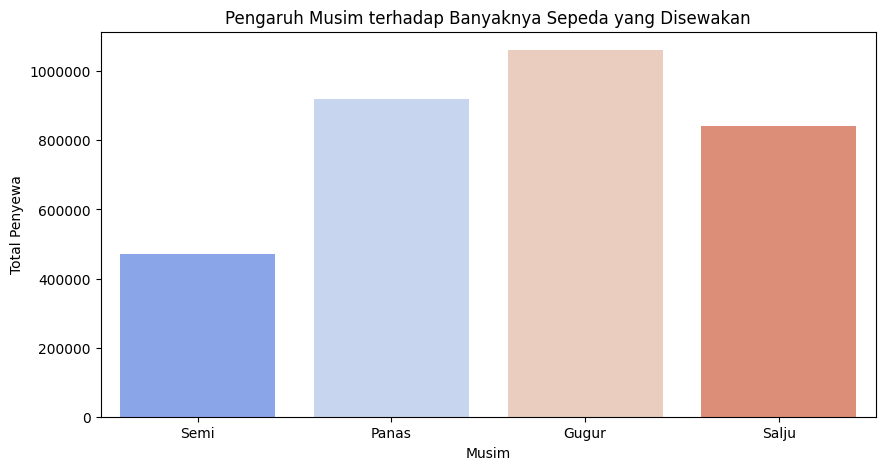

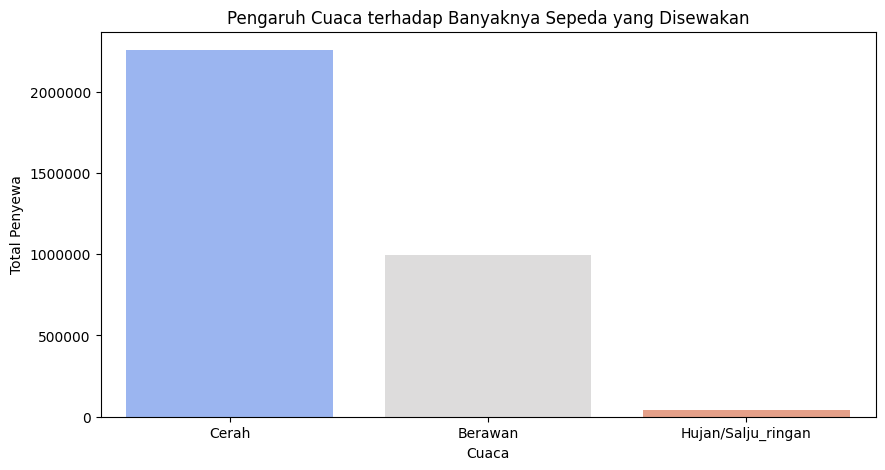

In [37]:
# membuat plot ttg efek musim pada penyewaan
data_per_musim = day_df.groupby(by='musim', observed=False).agg({
    'total_penyewa':['sum']
}).reset_index() # Reset index to use as DataFrame

plt.figure(figsize=(10,5))
ax1 = sns.barplot(x='musim', y=('total_penyewa', 'sum'), data=data_per_musim, palette='coolwarm', hue='musim', legend=False)
plt.title('Pengaruh Musim terhadap Banyaknya Sepeda yang Disewakan')
plt.xlabel('Musim')
plt.ylabel('Total Penyewa')
ax1.ticklabel_format(style='plain', axis='y')
plt.show()

# membuat plot ttg efek cuaca pad peyewaan
data_per_kondisi_cuaca = day_df.groupby(by='kondisi_cuaca', observed=False).agg({
    'total_penyewa':['sum']
}).reset_index() # Reset index to use as DataFrame

plt.figure(figsize=(10,5))
ax2 = sns.barplot(x='kondisi_cuaca', y=('total_penyewa', 'sum'), data=data_per_kondisi_cuaca, palette='coolwarm', hue='kondisi_cuaca', legend=False)
plt.title('Pengaruh Cuaca terhadap Banyaknya Sepeda yang Disewakan')
plt.xlabel('Cuaca')
plt.ylabel('Total Penyewa')
ax2.ticklabel_format(style='plain', axis='y')
plt.show()

**Explanation**

Diatas saya punya grafik batang dimana <br>
 Grafik batang ini memvisualisasikan efek yang di berikan **musim dan cuaca** terhadap jumlah sepeda yang berhasil di sewakan<br>


*   Sumbu X (kiri-kanan) menunjukan tipe musim/cuaca
*   Sumbu Y (bawah-atas) menunjukan jumlah penyewa sepeda
<br>

Berdasarkan kedua grafik batang tersebut:

1. Pengaruh Musim: Grafik pertama jelas menunjukkan bahwa Musim Gugur memiliki jumlah total penyewaan sepeda tertinggi, diikuti oleh Musim Panas, Musim Dingin, dan Musim Semi memiliki jumlah terendah. Ini menunjukkan bahwa musim sangat mempengaruhi permintaan penyewaan sepeda, dengan Musim Gugur menjadi waktu yang paling populer.
2. Pengaruh Cuaca: Grafik kedua menunjukkan bahwa kondisi Cuaca Cerah terkait dengan jumlah penyewaan tertinggi. Penyewaan menurun drastis pada kondisi Berawan dan sangat rendah saat Hujan/Salju Ringan. Tidak ada penyewaan yang tercatat pada kondisi Hujan/Salju Lebat dalam data ini, yang menunjukkan bahwa cuaca buruk menghalangi penyewaan.

Jadi musim dan kondisi cuaca keduanya memainkan peran penting dalam menentukan jumlah penyewaan sepeda. Kondisi optimal untuk jumlah penyewaan yang tinggi adalah selama Musim Gugur dan saat cuaca cerah.


###  Pertanyaan 2

**Bagaimana Perbandingan hari kerja dengan hari libur terhadap penggunaan sepeda? dan Pada hari apa sepeda banyak di sewa?**

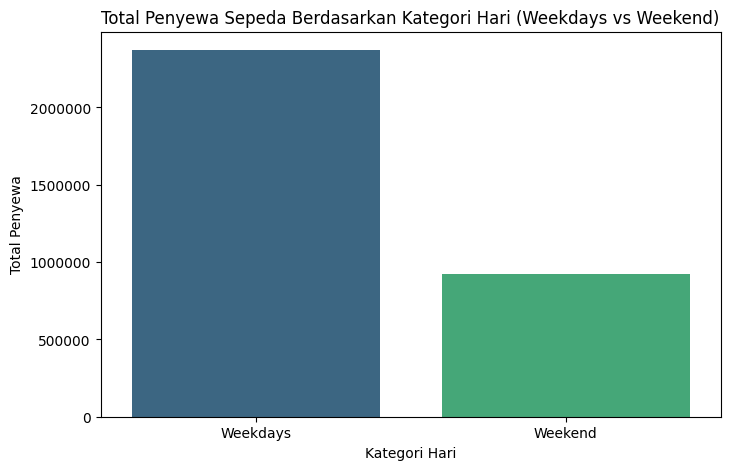

In [38]:
#menghitung total penyewaan per kategori hari
total_rentals_per_day_category = day_df.groupby('kategori_hari', observed=False)['total_penyewa'].sum().reset_index()

# membuat bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='kategori_hari', y='total_penyewa', data=total_rentals_per_day_category, palette='viridis', hue='kategori_hari', legend=False)
plt.title('Total Penyewa Sepeda Berdasarkan Kategori Hari (Weekdays vs Weekend)')
plt.xlabel('Kategori Hari')
plt.ylabel('Total Penyewa')
plt.ticklabel_format(style='plain', axis='y') # Ensure y-axis is not in scientific notation
plt.show()

**Explanation**

Grafik batang tersebut memvisualisasikan total jumlah penyewa sepeda selama periode dua tahun (2011-2012), dibagi berdasarkan apakah hari tersebut termasuk hari kerja (Weekdays) atau akhir pekan (Weekend).

- Sumbu X (horizontal) menunjukkan kategori hari: Weekdays dan Weekend.
- Sumbu Y (vertikal) menunjukkan total jumlah penyewa.

Dari bar plot tersebut, terlihat jelas bahwa:

Jumlah Total Penyewa di Hari Kerja (Weekdays) jauh lebih tinggi dibandingkan dengan jumlah total penyewa di akhir pekan (Weekend). Bar plot untuk "Weekdays" memiliki tinggi yang signifikan lebih besar daripada bar plot untuk "Weekend".
Ini mengkonfirmasi temuan sebelumnya dari EDA bahwa sepeda lebih banyak digunakan pada hari kerja. Visualisasi ini secara efektif menyoroti seberapa besar perbedaan total penggunaan antara kedua kategori hari tersebut, memberikan gambaran yang lebih kuat tentang pentingnya hari kerja bagi bisnis Bike Sharing.

Insight ini penting bagi bisnis untuk:<br>

- Fokus Operasional:<br> Mengalokasikan sumber daya (sepeda, personel) lebih banyak pada hari kerja untuk memenuhi permintaan yang lebih tinggi.
- Strategi Pemasaran:<br> Memahami bahwa target pasar utama untuk penggunaan harian adalah mereka yang menggunakan sepeda untuk keperluan hari kerja (misalnya, komuter).
- Perencanaan Kapasitas:<br> Memperhitungkan perbedaan permintaan antara hari kerja dan akhirpekan.

###  Pertanyaan 3

**Bagaimana performa penyewaan perusahaan Bike Sharing dalam 2 tahun ini(2011-2012)?**

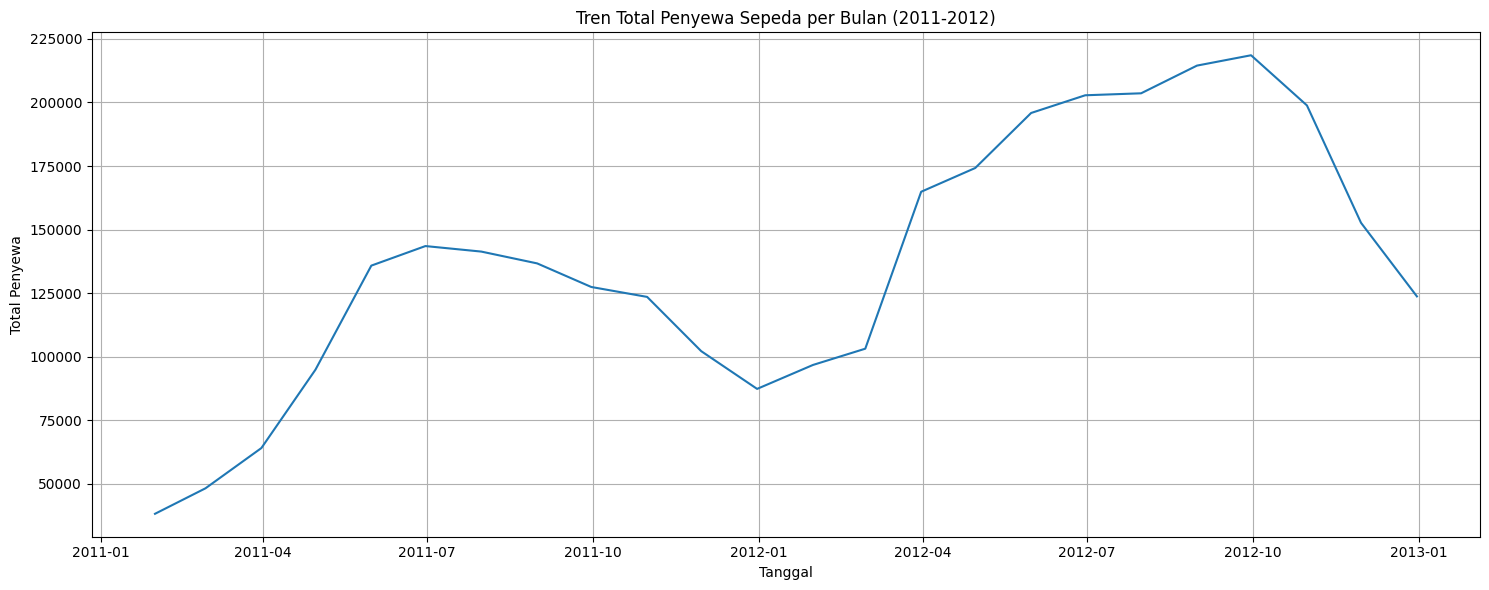

In [39]:
# Mengelompokkan berdasarkan tanggal dan menjumlahkan total penyewaan
daily_rentals = day_df.groupby('tanggal')['total_penyewa'].sum()

# Resampling untuk mendapatkan total penyewaan bulanan
monthly_performance_resampled = daily_rentals.resample('ME').sum()

# Membuat grafik garis
plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_performance_resampled)

# Menambahkan judul dan label
plt.title('Tren Total Penyewa Sepeda per Bulan (2011-2012)')
plt.xlabel('Tanggal')
plt.ylabel('Total Penyewa')
plt.grid(True)
plt.tight_layout() # Menyesuaikan tata letak
plt.ticklabel_format(style='plain', axis='y') # Memastikan sumbu y tidak dalam notasi ilmiah

# Menampilkan plot
plt.show()

**Explanation**

Grafik garis ini memvisualisasikan total jumlah penyewaan sepeda setiap bulannya selama periode dua tahun dari tahun 2011 hingga 2012.

- Sumbu X (horizontal) menunjukkan waktu dalam bulanan dari awal tahun 2011 hingga akhir tahun 2012.
- Sumbu Y (vertikal) menunjukkan total jumlah penyewa sepeda pada bulan tersebut.
- Garis Biru menghubungkan titik-titik data bulanan, menunjukkan tren naik turunnya total penyewaan dari waktu ke waktu.<br>

Insight yang didapat dari grafik ini:

1. Tren Pertumbuhan yang Positif:<br> Secara keseluruhan, terlihat jelas bahwa ada tren peningkatan jumlah total penyewa sepeda dari tahun 2011 ke tahun 2012. Garis cenderung naik dari awal tahun 2011 hingga akhir tahun 2012, meskipun ada fluktuasi musiman. Ini menunjukkan bahwa bisnis Bike Sharing ini mengalami pertumbuhan selama periode tersebut.
2. Pola Musiman Berulang:<br> Setiap tahun, terlihat pola musiman yang berulang. Jumlah penyewaan cenderung rendah di awal tahun (sekitar Januari-Maret), meningkat tajam di bulan-bulan pertengahan tahun (sekitar April-September), mencapai puncak di musim panas/gugur, dan kemudian kembali menurun di akhir tahun (sekitar Oktober-Desember). Pola ini konsisten di kedua tahun dan mengkonfirmasi pengaruh musim terhadap penggunaan sepeda.
3. Peningkatan di Setiap Bulan:<br> Meskipun ada pola musiman, perhatikan bahwa jumlah penyewaan pada bulan yang sama di tahun 2012 umumnya lebih tinggi dibandingkan dengan bulan yang sama di tahun 2011. Ini adalah indikator kuat dari pertumbuhan year-over-year (dari tahun ke tahun).

Grafik ini dengan jelas menunjukkan bahwa performa perusahaan Bike Sharing dalam hal jumlah total penyewaan sepeda telah meningkat secara signifikan dari tahun 2011 ke tahun 2012. Peningkatan ini terjadi meskipun ada pola musiman yang konsisten setiap tahunnya. Bisnis ini menunjukkan tren pertumbuhan yang sehat selama periode dua tahun tersebut, yang bisa disebabkan oleh berbagai faktor seperti peningkatan kesadaran masyarakat, perluasan layanan, atau peningkatan jumlah pengguna terdaftar.

Insight ini penting untuk:

- Evaluasi Kinerja Bisnis: Mengkonfirmasi bahwa strategi bisnis atau kondisi pasar telah mendukung pertumbuhan penyewaan.
- Prediksi dan Perencanaan: Memberikan dasar untuk memprediksi permintaan di masa depan dan merencanakan kapasitas (jumlah sepeda, stasiun dok) serta strategi pemasaran.

###  Pertanyaan 4

**Bagaimana tren bulanan pengguna casual dan registered?**

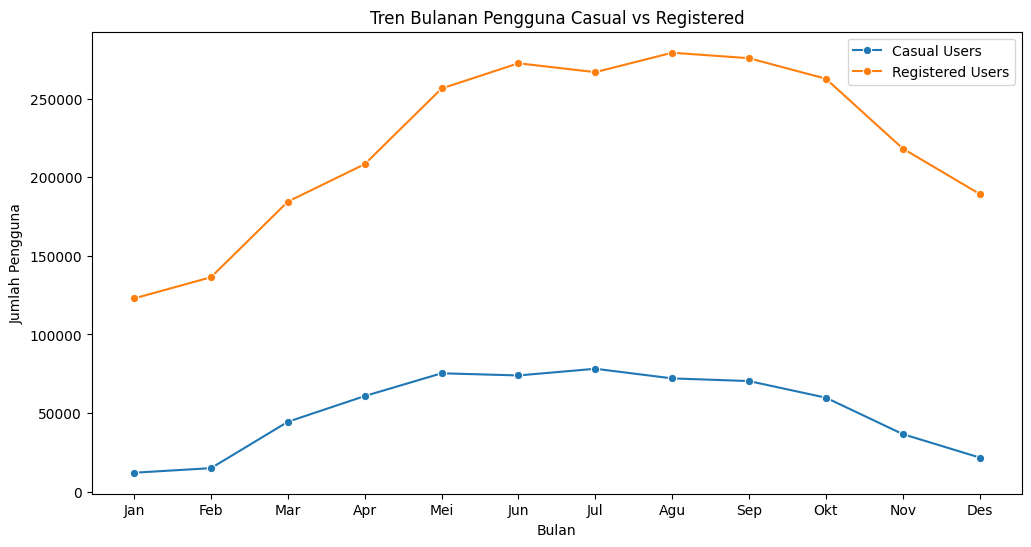

In [40]:
# Hitung total jumlah pengguna 'casual' dan 'registered' per bulan
monthly_rentals = day_df.groupby('bulan', observed=False)[['casual', 'registered']].sum().reset_index()

# Urutkan berdasarkan bulan untuk plotting yang benar
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des']
monthly_rentals['bulan'] = pd.Categorical(monthly_rentals['bulan'], categories=month_order, ordered=True)
monthly_rentals = monthly_rentals.sort_values('bulan')

# Buat grafik garis
plt.figure(figsize=(12, 6))
sns.lineplot(x='bulan', y='casual', data=monthly_rentals, marker='o', label='Casual Users')
sns.lineplot(x='bulan', y='registered', data=monthly_rentals, marker='o', label='Registered Users')

# Tambahkan judul dan label
plt.title('Tren Bulanan Pengguna Casual vs Registered')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna')
plt.ticklabel_format(style='plain', axis='y') # Ensure y-axis is not in scientific notation

# Tambahkan legenda
plt.legend()

# Tampilkan grafik
plt.show()

**Explanation**

Grafik garis ini memvisualisasikan total jumlah penyewa sepeda untuk pengguna casual (pengguna tidak terdaftar) dan registered (pengguna terdaftar) dari bulan ke bulan, berdasarkan data selama dua tahun (2011-2012).

- Sumbu X (horizontal) menunjukkan bulan dalam setahun (Januari hingga Desember).
- Sumbu Y (vertikal) menunjukkan total jumlah pengguna (casual atau registered) untuk bulan tersebut.
- Garis Biru mewakili tren bulanan untuk pengguna casual.
- Garis Oranye mewakili tren bulanan untuk pengguna registered.<br>

Insight yang didapat dari grafik ini:

1. Pengguna Registered Mendominasi: Secara keseluruhan, jumlah pengguna registered (garis oranye) jauh lebih tinggi daripada jumlah pengguna casual (garis biru) di setiap bulannya. Ini mengkonfirmasi temuan sebelumnya bahwa pengguna terdaftar merupakan segmen pasar utama bagi bisnis Bike Sharing ini.
2. Pola Musiman yang Jelas: Kedua jenis pengguna menunjukkan pola musiman yang serupa. Jumlah penyewaan cenderung meningkat dari awal tahun (Januari-Februari), mencapai puncak di bulan-bulan pertengahan tahun (sekitar Mei-September), dan kemudian menurun kembali di akhir tahun (Oktober-Desember).
3. Variasi Pengguna Casual Lebih Besar: Meskipun polanya sama, tren pengguna casual (garis biru) terlihat memiliki variasi yang lebih besar dari bulan ke bulan dibandingkan pengguna registered (garis oranye). Peningkatan dan penurunan jumlah pengguna casual di musim puncak dan musim sepi terlihat lebih curam. Ini mungkin menunjukkan bahwa pengguna casual lebih sensitif terhadap faktor musiman seperti cuaca atau liburan.
4. Pengguna Registered Lebih Stabil: Pengguna registered (garis oranye) menunjukkan tren yang lebih stabil dan peningkatannya dari bulan ke bulan terlihat lebih bertahap dibandingkan pengguna casual. Hal ini wajar karena pengguna terdaftar kemungkinan besar adalah komuter atau pengguna rutin yang menggunakan sepeda sebagai bagian dari rutinitas harian mereka terlepas dari sedikit fluktuasi cuaca.<br>

Grafik tren bulanan ini menegaskan dominasi pengguna registered dan menunjukkan pola musiman yang kuat untuk kedua jenis pengguna, dengan puncak penggunaan di musim panas dan gugur. Perbedaan variabilitas antara kedua garis menunjukkan bahwa pengguna casual lebih dipengaruhi oleh faktor musiman dibandingkan pengguna registered yang memiliki pola penggunaan lebih stabil.

Insight ini penting untuk:

- Perencanaan Pemasaran: Menargetkan promosi yang berbeda untuk pengguna casual di musim puncak (misalnya, turis atau pengguna rekreasi) dan program retensi untuk pengguna registered.
- Manajemen Persediaan: Menyiapkan lebih banyak sepeda di musim puncak untuk memenuhi lonjakan permintaan dari kedua segmen pengguna.
- Pemahaman Perilaku Pengguna: Memahami bahwa pengguna registered adalah tulang punggung bisnis dengan penggunaan yang lebih konsisten sepanjang tahun, sementara pengguna casual memberikan lonjakan permintaan di musim-musim tertentu.

###  Pertanyaan 5

**Bagaimana pola penggunaan sepeda per jam mencerminkan kebiasaan dan rutinitas harian pengguna selama seminggu?**

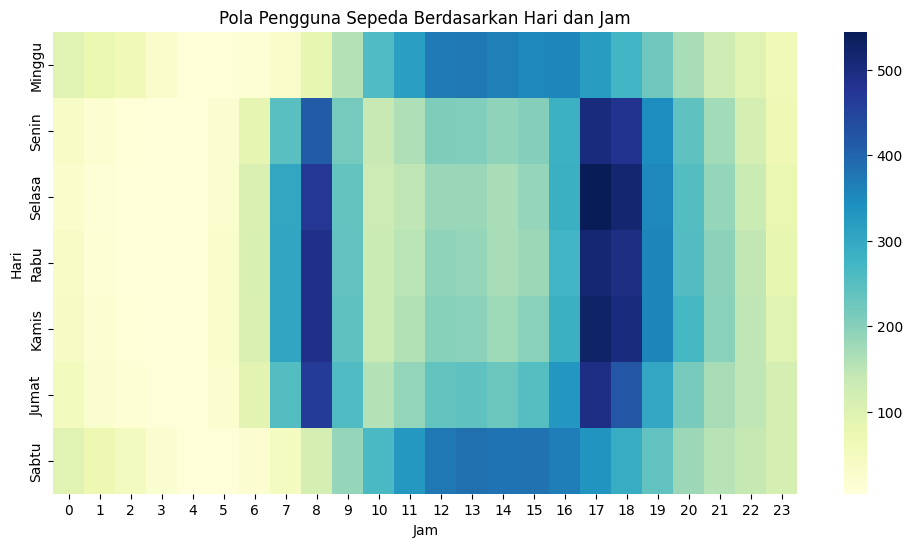

In [41]:
#membuat pivot table buat lihat rata-rata jumlah user perjam setiap harinya
pivot_df = hour_df.pivot_table(index='seminggu', columns='jam', values='total_penyewa', aggfunc='mean', observed=False)
plt.figure(figsize=(12,6))
#menentukan warna gradasi yellow green blue
sns.heatmap(pivot_df, cmap='YlGnBu')
plt.title('Pola Pengguna Sepeda Berdasarkan Hari dan Jam')
plt.xlabel('Jam')
plt.ylabel('Hari')
plt.show()

**Explanation**


Heatmap tersebut memvisualisasikan rata-rata jumlah penyewa sepeda untuk setiap jam dalam sehari, dipisahkan berdasarkan hari dalam seminggu. Warna pada heatmap menunjukkan intensitas penggunaan: semakin gelap warnanya (biru tua), semakin tinggi rata-rata jumlah penyewa pada jam dan hari tersebut.

Berikut adalah insight yang bisa kita dapatkan:

1. Pola Penggunaan di Hari Kerja (Senin-Jumat):
- Terlihat dua puncak utama penggunaan sepeda di hari kerja. Puncak pertama terjadi di pagi hari, sekitar pukul 07:00 - 09:00. Ini sangat mungkin mencerminkan kebiasaan pengguna yang menggunakan sepeda untuk perjalanan komuter pagi (berangkat kerja atau sekolah).
- Puncak kedua terjadi di sore hari, sekitar pukul 17:00 - 19:00. Ini mencerminkan kebiasaan pengguna yang menggunakan sepeda untuk perjalanan pulang kerja atau sekolah di sore hari.
- Di luar jam-jam puncak ini, penggunaan cenderung lebih rendah.
2. Pola Penggunaan di Akhir Pekan (Sabtu-Minggu):
- Pola penggunaan di akhir pekan berbeda dengan hari kerja. Tidak ada puncak yang tajam di pagi atau sore hari seperti hari kerja.
- Penggunaan cenderung lebih merata sepanjang hari, dengan sedikit peningkatan di sekitar siang hingga sore hari (sekitar pukul 10:00 - 18:00).
- Ini menunjukkan bahwa di akhir pekan, pengguna mungkin menggunakan sepeda untuk aktivitas rekreasi, sosial, atau keperluan pribadi lainnya yang jadwalnya lebih fleksibel dibandingkan rutinitas kerja/sekolah.
3. Perbandingan Hari Kerja vs. Akhir Pekan:
- Secara umum, rata-rata jumlah penyewa pada jam-jam puncak di hari kerja (pagi dan sore) lebih tinggi dibandingkan dengan rata-rata penggunaan di jam-jam puncak akhir pekan. Ini mendukung temuan sebelumnya bahwa total penyewaan lebih tinggi di hari kerja.



Heatmap ini dengan jelas menunjukkan bahwa pola penggunaan sepeda Bike Sharing sangat dipengaruhi oleh kebiasaan dan rutinitas harian pengguna. Hari kerja didominasi oleh pola komuter pagi dan sore, sementara akhir pekan menunjukkan pola penggunaan yang lebih santai dan menyebar sepanjang hari.

Insight ini sangat penting bagi bisnis untuk:

- Mengoptimalkan ketersediaan sepeda: Menyediakan lebih banyak sepeda di lokasi-lokasi strategis pada jam-jam puncak hari kerja dan mungkin menyesuaikan distribusi di akhir pekan.
- Merencanakan promosi atau acara: Menargetkan promosi di luar jam sibuk hari kerja atau di akhir pekan untuk mendorong penggunaan di waktu-waktu yang kurang padat.
- Memahami target pasar: Mengetahui bahwa segmen pengguna komuter sangat signifikan di hari kerja.

##  Analisis Lanjutan

**Analisis Clustering(Pengelompokan)**

Di sini saya akan melakukan analisis lanjutan dengan metode clustering. Secara definisi umum Analisis clustering adalah metode statistik untuk mengelompokkan objek-objek atau titik data yang memiliki kesamaan karakteristik ke dalam kelompok (cluster).<br>

Tujuan analisis clustering
- Mengelompokkan data serupa:<br>

 Mengelompokkan objek berdasarkan kesamaan karakteristiknya sehingga setiap objek dalam satu kelompok memiliki sifat yang relatif homogen.
- Mengurangi kompleksitas data:<br>

 Mengorganisir data dalam jumlah besar ke dalam kelompok yang lebih kecil dan mudah dikelola untuk analisis lebih lanjut.
- Mendukung pengambilan keputusan:<br>

 Membantu menemukan pola dan tren tersembunyi untuk digunakan dalam berbagai bidang, seperti bisnis untuk mengidentifikasi segmen pasar atau konsumen.


**Pengelompokan Pengguna berdasarkan kategori kelembaban**



In [42]:
hour_df.groupby(by='kategori_kelembaban', observed=False).agg({
    'total_penyewa':['count']
})

,total_penyewa
,count
kategori_kelembaban,
Ideal,5505
Terlalu kering,3518
Terlalu lembab,8356


Berdasarkan pengelompokan di atas pengguna di ketahui masuk kelompok yang lebih cenderung menyewa sepeda pada humidity yang terlalu lembab.

##  Conclusion

1.  Bagaimana musim dan cuaca bisa memberikan efek pada jumlah sepeda yang berhasil tersewa? Pada musim dan cuaca seperti apa tingkat penyewaan tertinggi dan berapa jumlah sepeda yang tersewakan?;✅
2.  Bagaimana perbandingan hari kerja dan hari libur terhadap penyewaan sepeda? Pada hari apa sepeda lebih banyak di sewa?;✅
3.  Bagaimana performa penyewaan perusahaan Bike Sharing dalam 2 tahun ini(2011-2012)?;✅
4.  Bagaimana tren bulanan pengguna casual dan registered?;✅
5.  Bagaimana pola penggunaan sepeda per jam mencerminkan kebiasaan dan rutinitas harian pengguna selama seminggu?; ✅





Berdasarkan analisis yang telah dilakukan terhadap dataset bike sharing, berikut adalah kesimpulan dan beberapa rekomendasi bisnis yang bisa diberikan:

Kesimpulan:

1. Pengaruh Musim dan Cuaca:<br>
 Musim dan cuaca sangat memengaruhi jumlah penyewaan sepeda. Tingkat penyewaan tertinggi terjadi selama musim Gugur dan dalam kondisi cuaca Cerah. Sebaliknya, penyewaan paling rendah terjadi di musim Semi dan dalam kondisi cuaca buruk (hujan lebat/salju).
2. Penggunaan Hari Kerja vs. Akhir Pekan:<br> Penggunaan sepeda secara signifikan lebih tinggi selama hari kerja dibandingkan akhir pekan. Ini menunjukkan bahwa sebagian besar pengguna memanfaatkan layanan ini untuk perjalanan harian atau terkait pekerjaan.
3. Performa Keseluruhan: <br> Perusahaan Bike Sharing menunjukkan tren pertumbuhan positif dalam total penyewaan dari tahun 2011 hingga 2012, meskipun ada fluktuasi musiman yang berulang. Ini menandakan bisnis yang sehat dan berkembang.
4. Pengguna Casual vs. Registered:<br> Pengguna terdaftar (registered) secara konsisten menyumbang porsi penyewaan total yang jauh lebih besar daripada pengguna casual (tidak terdaftar) di setiap bulannya. Kedua tipe pengguna menunjukkan pola musiman yang serupa, namun penyewaan oleh pengguna casual menunjukkan variabilitas bulanan yang lebih besar, kemungkinan lebih dipengaruhi oleh faktor langsung seperti cuaca atau acara.
5. Pola Penggunaan Per Jam:<br> Pola penggunaan per jam jelas mencerminkan rutinitas harian. Hari kerja menunjukkan puncak yang berbeda di pagi hari (sekitar pukul 07:00 - 09:00) dan sore hari (sekitar pukul 17:00 - 19:00), yang mencerminkan jam sibuk berangkat dan pulang kerja/sekolah. Penggunaan akhir pekan lebih tersebar sepanjang hari (sekitar pukul 10:00 - 18:00), menunjukkan penggunaan yang lebih bersifat rekreasi.
6. Preferensi Kelembaban: <br> Pengguna cenderung lebih sering menyewa sepeda ketika tingkat kelembaban dikategorikan sebagai "Terlalu lembab", diikuti oleh "Ideal", dan kemudian "Terlalu kering". Ini adalah temuan menarik yang mungkin memerlukan investigasi lebih lanjut.

**Rekomendasi Bisnis**:

1. Optimalkan Inventaris berdasarkan Musim dan Cuaca:<br> Pastikan ketersediaan sepeda yang cukup selama musim puncak (Gugur dan Panas) dan antisipasi permintaan yang lebih rendah selama musim Semi dan cuaca buruk. Pertimbangkan harga dinamis atau promosi yang ditargetkan selama periode di luar jam sibuk atau kondisi cuaca yang kurang ideal untuk merangsang permintaan jika memungkinkan.
2. Fokus pada Komuter Hari Kerja:<br> Karena hari kerja mendominasi sebagian besar penyewaan, terus prioritaskan layanan dan infrastruktur yang melayani komuter. Ini termasuk memastikan ketersediaan sepeda di lokasi-lokasi kunci selama jam sibuk pagi dan sore.
3. Manfaatkan Tren Pertumbuhan:<br> Tren pertumbuhan positif menunjukkan pasar yang kuat. Lanjutkan upaya pemasaran untuk mendapatkan pengguna baru (terutama pengguna terdaftar) dan mempertahankan pengguna yang sudah ada. Jelajahi kemitraan atau insentif yang mendorong pengguna casual menjadi pengguna terdaftar.
4. Sesuaikan Strategi untuk Tipe Pengguna:<br> Kembangkan strategi pemasaran dan layanan yang berbeda untuk pengguna casual dan terdaftar. Untuk pengguna casual, fokus pada promosi musiman atau menargetkan turis dan pengendara rekreasi selama bulan-bulan puncak. Untuk pengguna terdaftar, tekankan program loyalitas atau manfaat berlangganan.
5. Alokasi Per Jam:<br> Optimalkan distribusi dan penempatan staf berdasarkan puncak jam yang diamati, terutama selama jam sibuk komuter hari kerja. Pertimbangkan untuk merelokasi sepeda ke lokasi dengan permintaan tinggi sebelum jam-jam puncak.
6. Investigasi Dampak Kelembaban:<br> Analisis lebih lanjut hubungan antara kelembaban dan penyewaan. Meskipun "Terlalu lembab" menunjukkan jumlah tertinggi dalam analisis clustering, ini mungkin berkorelasi dengan faktor lain seperti suhu atau musim. Memahami hubungan ini dengan lebih baik dapat menginformasikan inisiatif kenyamanan pengguna atau promosi yang ditargetkan berdasarkan perkiraan cuaca.
7. Pengambilan Keputusan Berbasis Data:<br> Terus pantau dan analisis data penyewaan secara berkala untuk mengidentifikasi tren yang muncul, mengevaluasi efektivitas strategi yang diterapkan, dan membuat keputusan yang tepat mengenai operasional, pemasaran, dan ekspans

In [43]:
# menyimpan file data day_df yang bersih ke file csv
day_df.to_csv("day_data_bike.csv", index=False)

In [44]:
#menyimpan file data csv bersih
hour_df.to_csv("hour_data_bike.csv", index=False)